***Netflix Content Analysis + Personalized Genre Explorer***
Members:
Subhan Tanveer (01-136242-041)
Ameena Gul (01-136242-051)
Sidra Tauqeer (01-136242-039)

"We loaded the Netflix dataset, cleaned it by handling nulls, duplicates, and formatting issues, and prepared it for analysis. Using Pandas and NumPy, we explored genres, maturity ratings, release year trends, and recommendation patterns. We performed filtering, calculated statistical insights, and created clear visualizations with Matplotlib. Finally, we exported the cleaned dataset and managed all work through GitHub with meaningful commits."

In [28]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class DatasetLoader:
    def __init__(self, filepath):
        self.df = pd.read_csv("C:\\Users\\Admin\\Desktop\\NETFLIX\\Netflix-Analysis\\SUBHAN_cleaned.csv")
        print(f"\n✅ Dataset loaded: {self.df.shape[0]} rows x {self.df.shape[1]} cols\n")
        print("----- PREVIEW -----")
        print(self.df.head(), "\n")

    def get_data(self):
        return self.df

In [2]:
if __name__ == "__main__":

    # LOAD
    loader = DatasetLoader("C:\\Users\\Admin\\Desktop\\NETFLIX\\Netflix-Analysis\\SUBHAN_cleaned.csv")


✅ Dataset loaded: 3759 rows x 9 cols

----- PREVIEW -----
     N_id                           Title Main Genre  \
0  215309      Ace Ventura: Pet Detective     Comedy   
1  215318  Ace Ventura: When Nature Calls     Comedy   
2  217258               The Addams Family     Comedy   
3  217303            Addams Family Values     Comedy   
4  235527                       Agneepath      Drama   

                                Sub Genres  Release Year Maturity Rating  \
0                      Comedy, Mystery, US          1994               A   
1           Comedy, Action & Adventure, US          1995         U/A 16+   
2                               Comedy, US          1991         U/A 13+   
3                               Comedy, US          1993         U/A 13+   
4  Hindi-Language, Bollywood, Crime, Drama          1990         U/A 16+   

                                      Original Audio  \
0                          Hindi, English [Original]   
1                          Hindi, E

DATA CLEANING

In [3]:
class DataCleaner:
    def __init__(self, df):
        self.df = df

    def clean_nulls(self):
        print("Nulls before:\n", self.df.isnull().sum())
        self.df.dropna(inplace=True)
        print("\nNulls after:\n", self.df.isnull().sum(), "\n")

    def remove_duplicates(self):
        print("Duplicates before:", self.df.duplicated().sum())
        self.df.drop_duplicates(inplace=True)
        print("Duplicates after:", self.df.duplicated().sum(), "\n")

    def convert_release_year(self):
        self.df['Release Year'] = self.df['Release Year'].astype('Int64')
        print("✅ Converted 'Release Year' to Int64\n")

    def drop_missing_id(self):
        before = len(self.df)
        self.df.dropna(subset=['N_id'], inplace=True)
        print(f"✅ Dropped {before-len(self.df)} rows with missing N_id\n")

    def clean_titles(self):
        self.df['Title'] = self.df['Title'].astype(str).str.strip().str.title()
        print("✅ Titles cleaned\n")

    def add_recommendation_count(self):
        self.df['Recommendation_Count'] = self.df['Recommendations'].apply(
            lambda x: len(str(x).split(',')) if pd.notna(x) and str(x).strip() else 0
        )
        print("✅ Recommendation count added\n")

    def get_cleaned_data(self):
        return self.df


In [32]:
cleaner = DataCleaner(loader.get_data())
cleaner.clean_nulls()
cleaner.remove_duplicates()
cleaner.convert_release_year()
cleaner.drop_missing_id()
cleaner.clean_titles()
cleaner.add_recommendation_count()

cleaned_df = cleaner.get_cleaned_data()

Nulls before:
 N_id                    0
Title                   0
Main Genre              0
Sub Genres              0
Release Year            0
Maturity Rating         0
Original Audio          0
Recommendations         0
Recommendation_Count    0
dtype: int64

Nulls after:
 N_id                    0
Title                   0
Main Genre              0
Sub Genres              0
Release Year            0
Maturity Rating         0
Original Audio          0
Recommendations         0
Recommendation_Count    0
dtype: int64 

Duplicates before: 0
Duplicates after: 0 

✅ Converted 'Release Year' to Int64

✅ Dropped 0 rows with missing N_id

✅ Titles cleaned

✅ Recommendation count added



EDA FUNCTIONS

In [4]:
class DataEDA:
    def __init__(self, df):
        self.df = df

    def overview(self):
        print("\n----- DATA OVERVIEW -----")
        print(self.df.head(), "\n")
        print(self.df.info(), "\n")
        print(self.df.describe(), "\n")

    def correlations(self):
        corr = self.df.corr(numeric_only=True)
        print("Correlation Matrix:\n", corr, "\n")

    def top_genres(self):
        print("Top Genres:\n", self.df['Main Genre'].value_counts().head(10), "\n")

    def avg_release_by_genre(self):
        print("Avg Release Year by Genre:\n",
              self.df.groupby('Main Genre')['Release Year'].mean(), "\n")

    def rating_counts(self):
        print("Maturity Ratings:\n",
              self.df['Maturity Rating'].value_counts(), "\n")

    def yearly_frequency(self):
        print("Year Frequency:\n",
              self.df['Release Year'].value_counts().sort_index().head(20), "\n")



In [34]:
eda = DataEDA(cleaned_df)
eda.overview()
eda.top_genres()
eda.rating_counts()
eda.yearly_frequency()
eda.avg_release_by_genre()
eda.correlations()




----- DATA OVERVIEW -----
     N_id                           Title Main Genre  \
0  215309      Ace Ventura: Pet Detective     Comedy   
1  215318  Ace Ventura: When Nature Calls     Comedy   
2  217258               The Addams Family     Comedy   
3  217303            Addams Family Values     Comedy   
4  235527                       Agneepath      Drama   

                                Sub Genres  Release Year Maturity Rating  \
0                      Comedy, Mystery, US          1994               A   
1           Comedy, Action & Adventure, US          1995         U/A 16+   
2                               Comedy, US          1991         U/A 13+   
3                               Comedy, US          1993         U/A 13+   
4  Hindi-Language, Bollywood, Crime, Drama          1990         U/A 16+   

                                      Original Audio  \
0                          Hindi, English [Original]   
1                          Hindi, English [Original]   
2  English 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   N_id                  3759 non-null   int64 
 1   Title                 3759 non-null   object
 2   Main Genre            3759 non-null   object
 3   Sub Genres            3759 non-null   object
 4   Release Year          3759 non-null   Int64 
 5   Maturity Rating       3759 non-null   object
 6   Original Audio        3759 non-null   object
 7   Recommendations       3759 non-null   object
 8   Recommendation_Count  3759 non-null   int64 
dtypes: Int64(1), int64(2), object(6)
memory usage: 268.1+ KB
None 

               N_id  Release Year  Recommendation_Count
count  3.759000e+03        3759.0           3759.000000
mean   7.904158e+07   2018.639532             11.909018
std    9.128597e+06      6.989511              0.744124
min    2.153090e+05        1962.0              1.00

FILTERS

In [5]:
class DataFilter:
    def __init__(self, df):
        self.df = df

    def recent_after_2015(self):
        return self.df[self.df['Release Year'] >= 2015]

    def comedy(self):
        return self.df[self.df['Main Genre'] == 'Comedy']

    def drama(self):
        return self.df[self.df['Main Genre'] == 'Drama']


In [36]:
filters = DataFilter(cleaned_df)
print("Recent 2015+ Samples:\n", filters.recent_after_2015().head(), "\n")
print("Comedy Samples:\n", filters.comedy().head(), "\n")
print("Drama Samples:\n", filters.drama().head(), "\n")

Recent 2015+ Samples:
          N_id                                             Title   Main Genre  \
369  70302480                    Iliza Shlesinger: Freezing Hot       Comedy   
373  70303495                                           Phantom       Action   
379  70308063                       What Happened, Miss Simone?  Documentary   
386  80011621          The Spongebob Movie: Sponge Out Of Water         Kids   
387  80011852  The Other One: The Long Strange Trip Of Bob Weir  Documentary   

                                            Sub Genres  Release Year  \
369                                    Stand-Up Comedy          2015   
373      Hindi-Language, Bollywood, Action & Adventure          2015   
379  Music, Documentaries, Biographical Documentari...          2015   
386              Family, Children & Family, Comedy, US          2015   
387  Music, Documentaries, Biographical Documentari...          2015   

    Maturity Rating                                     Origina

EXPORT

In [6]:
class DataExporter:
    def __init__(self, df):
        self.df = df

    def save(self, filename="SUBHAN_cleaned.csv"):
        self.df.to_csv(filename, index=False)
        print(f"✅ Cleaned dataset saved: {filename}\n")

In [38]:
exporter = DataExporter(cleaned_df)
exporter.save()

✅ Cleaned dataset saved: SUBHAN_cleaned.csv



NUMPY TOOLKIT

In [7]:
import numpy as np
import pandas as pd

class NumpyToolkit:

    def __init__(self, file_path):
        """
        Load dataset and convert needed columns into NumPy arrays.
        """
        self.df = pd.read_csv("C:\\Users\\Admin\\Desktop\\NETFLIX\\Netflix-Analysis\\SUBHAN_cleaned.csv")

        # Extract useful numeric columns as NumPy arrays
        self.year_arr = self.df["Release Year"].dropna().astype(int).values
        self.id_arr   = self.df["N_id"].dropna().astype(int).values

        print("Dataset Loaded! Numeric arrays prepared.\n")

    def array_creation(self):
        """
        Show how dataset columns are represented as NumPy arrays.
        """
        print("Movie IDs Array:\n", self.id_arr[:10])
        print("\nRelease Years Array:\n", self.year_arr[:10])
        return self.id_arr, self.year_arr

    def generate(self):
        """
        Demonstrate NumPy generation tools using dataset ranges.
        """
        print("Range of Years (arange):", np.arange(self.year_arr.min(), self.year_arr.max(), 1))

        print("\nEven spacing between earliest & latest year (linspace):")
        print(np.linspace(self.year_arr.min(), self.year_arr.max(), 5))

        print("\nZero matrix example (not dataset-based):\n", np.zeros((2,2)))
        print("\nOnes matrix example:\n", np.ones((3,3)))

        print("\nRandom movie IDs sample:", np.random.choice(self.id_arr, 5))
        print("\nRandom integers (example):", np.random.randint(1, 100, 5), "\n")

    def stats(self, arr):
        """
        Compute statistics on given NumPy array (e.g., Release Year or IDs).
        """
        print("Sum:", np.sum(arr))
        print("Mean:", np.mean(arr))
        print("Median:", np.median(arr))
        print("Std Dev:", np.std(arr))
        print("Min:", np.min(arr))
        print("Max:", np.max(arr), "\n")

    def operations(self, arr):
        """
        Perform NumPy operations on dataset columns.
        """
        print("Add 5:", arr + 5)
        print("Multiply by 2:", arr * 2)
        print("Divide by 2:", arr / 2)
        print("Square values:", arr ** 2, "\n")

    def reshape(self):
        """
        Reshape IDs into a matrix just as an example.
        """
        trimmed = self.id_arr[:12]  # take first 12 IDs so reshape works
        reshaped = trimmed.reshape(3, 4)

        print("Reshaped IDs (3x4):\n", reshaped, "\n")

    def utilities(self, arr):
        """
        Dataset-based filtering and sorting using NumPy.
        """
        print("Filtered values > 200000:", arr[arr > 200000])
        print("Sorted array:", np.sort(arr), "\n")





In [40]:
toolkit = NumpyToolkit('C:\\Users\\Admin\\Desktop\\NETFLIX\\Netflix-Analysis\\SUBHAN_cleaned.csv')

ids, years = toolkit.array_creation()
toolkit.generate()
toolkit.stats(years)
toolkit.operations(years)
toolkit.reshape()
toolkit.utilities(ids)

Dataset Loaded! Numeric arrays prepared.

Movie IDs Array:
 [215309 215318 217258 217303 235527 265929 268371 318960 374329 538871]

Release Years Array:
 [1994 1995 1991 1993 1990 1995 1990 1983 1995 1993]
Range of Years (arange): [1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024]

Even spacing between earliest & latest year (linspace):
[1962.   1977.75 1993.5  2009.25 2025.  ]

Zero matrix example (not dataset-based):
 [[0. 0.]
 [0. 0.]]

Ones matrix example:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Random movie IDs sample: [81270692 81172902 81281387 81582586 81319110]

Random integers (example): [99 40 51 34 75] 

Sum: 7588066
Mean: 2018.6395317903698
Median: 2021.0
Std Dev: 6.988581223078058
Min: 1962
Max: 2025 

Add 

PLOTTING

In [43]:
class Plotter:
    def __init__(self, df):
        self.df = df

    # 1) Release Year Histogram
    def release_year_histogram(self):
        plt.figure(figsize=(8, 5))
        years = self.df['Release Year'].dropna()

        colors = plt.cm.PuRd(np.linspace(0.3, 1, 20))

        plt.hist(years, bins=20, color=colors, edgecolor='black')
        plt.title("Release Year Distribution")
        plt.xlabel("Year")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    # 2) Top Genres Horizontal Bar Chart
    def top_genre_bar(self):
        genres = self.df['Main Genre'].value_counts().head(10)

        colors = plt.cm.Set3(np.linspace(0, 1, len(genres)))

        plt.figure(figsize=(8, 5))
        plt.barh(genres.index, genres.values, color=colors, edgecolor='black')
        plt.xlabel("Number of Movies/Shows")
        plt.ylabel("Genre")
        plt.title("Top 10 Genres")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # 3) Top 5 Recommended Titles Pie Chart
    def recommendations_pie(self):
        data = (
            self.df.groupby('Title')['Recommendation_Count']
            .sum()
            .sort_values(ascending=False)
            .head(5)
        )

        colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

        plt.figure(figsize=(6, 6))
        plt.pie(data, labels=data.index, autopct="%1.1f%%", colors=colors)
        plt.title("Top 5 Recommended Titles")
        plt.axis("equal")
        plt.show()

    # 4) Maturity Rating Bar Chart
    def maturity_rating_bar(self):
        ratings = self.df['Maturity Rating'].value_counts()
        colors = plt.cm.viridis(np.linspace(0, 1, len(ratings)))

        plt.figure(figsize=(8, 5))
        plt.bar(ratings.index, ratings.values, color=colors, edgecolor='black')
        plt.title("Maturity Rating Distribution")
        plt.xlabel("Rating")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()


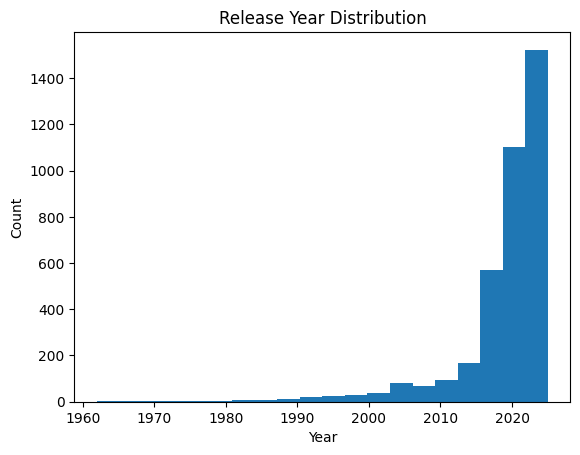

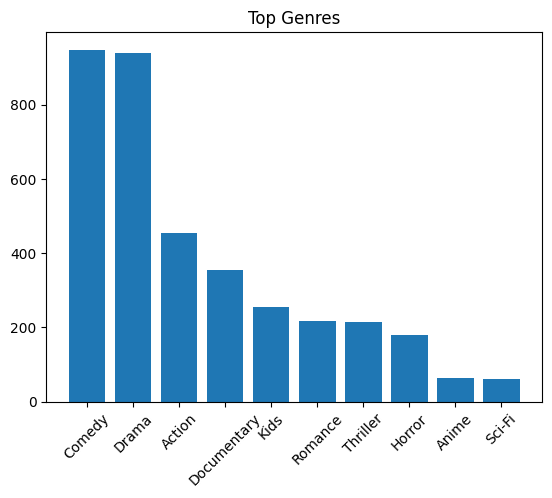

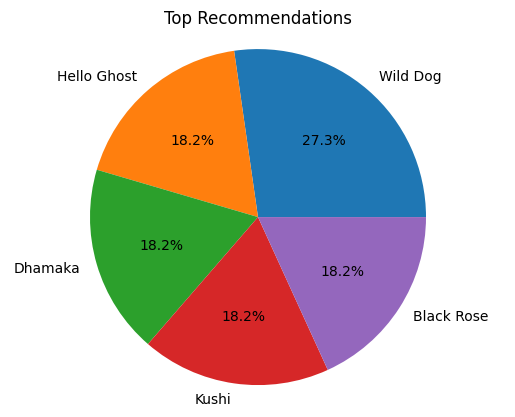

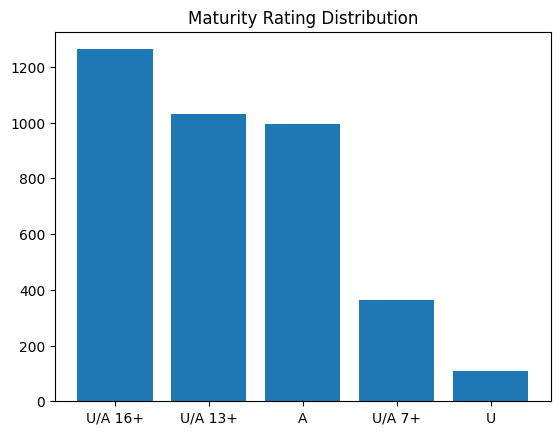

In [42]:
plot = Plotter(cleaned_df)
plot.release_year_histogram()
plot.top_genre_bar()
plot.recommendations_pie()
plot.maturity_rating_bar()

MAIN MENU


==== NETFLIX DATA MENU ====
1. Show first 5 rows
2. Show column names
3. Count Movies Released in Popular Years
4. Plot Top 10 Release Years (Bar Chart)
5. Plot Movies Per Year (Line Plot)
6. Heatmap: Release Year vs Maturity Rating
7. Exit

--- FIRST 5 ROWS ---
     N_id                           Title Main Genre  \
0  215309      Ace Ventura: Pet Detective     Comedy   
1  215318  Ace Ventura: When Nature Calls     Comedy   
2  217258               The Addams Family     Comedy   
3  217303            Addams Family Values     Comedy   
4  235527                       Agneepath      Drama   

                                Sub Genres  Release Year Maturity Rating  \
0                      Comedy, Mystery, US          1994               A   
1           Comedy, Action & Adventure, US          1995         U/A 16+   
2                               Comedy, US          1991         U/A 13+   
3                               Comedy, US          1993         U/A 13+   
4  Hindi-Language, 

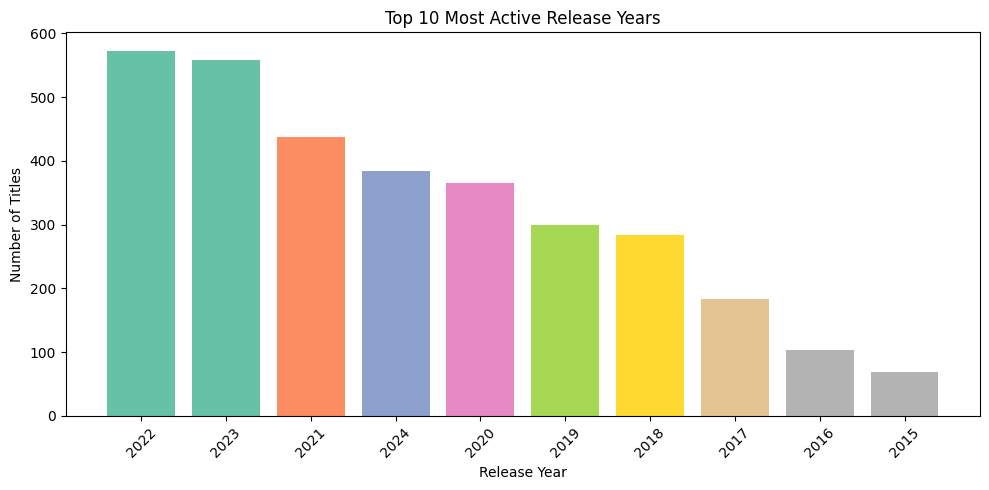


==== NETFLIX DATA MENU ====
1. Show first 5 rows
2. Show column names
3. Count Movies Released in Popular Years
4. Plot Top 10 Release Years (Bar Chart)
5. Plot Movies Per Year (Line Plot)
6. Heatmap: Release Year vs Maturity Rating
7. Exit


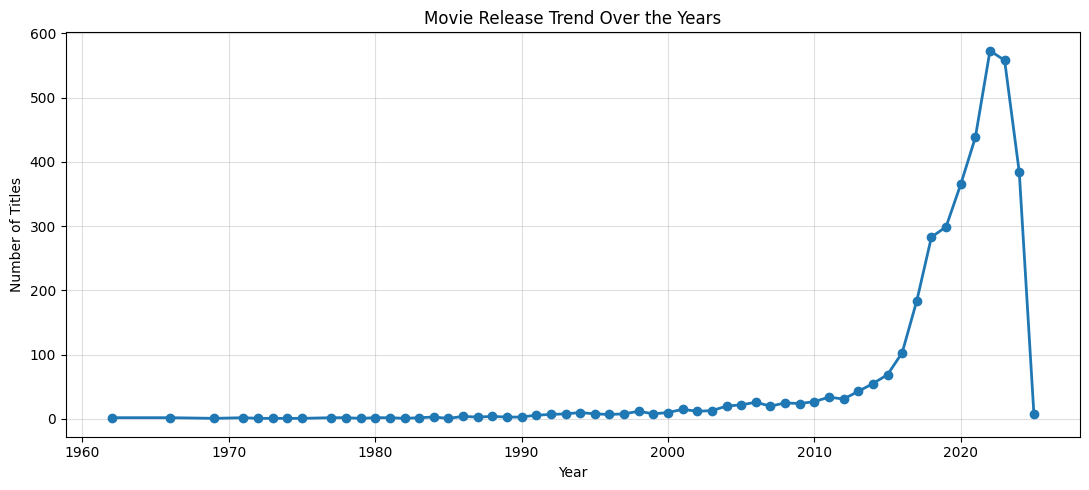


==== NETFLIX DATA MENU ====
1. Show first 5 rows
2. Show column names
3. Count Movies Released in Popular Years
4. Plot Top 10 Release Years (Bar Chart)
5. Plot Movies Per Year (Line Plot)
6. Heatmap: Release Year vs Maturity Rating
7. Exit


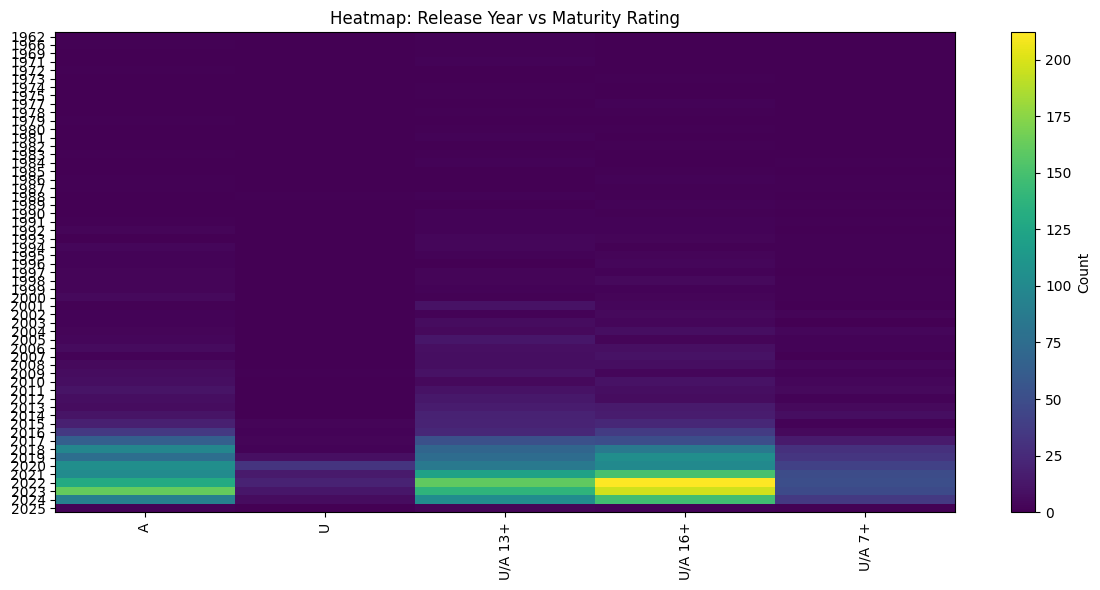


==== NETFLIX DATA MENU ====
1. Show first 5 rows
2. Show column names
3. Count Movies Released in Popular Years
4. Plot Top 10 Release Years (Bar Chart)
5. Plot Movies Per Year (Line Plot)
6. Heatmap: Release Year vs Maturity Rating
7. Exit
Goodbye!


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Admin\\Desktop\\NETFLIX\\Netflix-Analysis\\SUBHAN_cleaned.csv")

def menu():
    print("\n==== NETFLIX DATA MENU ====")
    print("1. Show first 5 rows")
    print("2. Show column names")
    print("3. Count Movies Released in Popular Years")
    print("4. Plot Top 10 Release Years (Bar Chart)")
    print("5. Plot Movies Per Year (Line Plot)")
    print("6. Heatmap: Release Year vs Maturity Rating")
    print("7. Exit")
    return int(input("Choose (1-7): "))

while True:

    choice = menu()

    # 1) First rows
    if choice == 1:
        print("\n--- FIRST 5 ROWS ---")
        print(df.head())

    # 2) Column names
    elif choice == 2:
        print("\n--- COLUMN NAMES ---")
        print(df.columns)

    # 3) Count Release Year Frequency
    elif choice == 3:
        year_count = df["Release Year"].value_counts()
        print("\n--- MOST COMMON RELEASE YEARS ---")
        print(year_count.head(10))

    # 4) Top 10 Release Years — Bar Chart
    elif choice == 4:
        year_count = df["Release Year"].value_counts().head(10)
        colors = plt.cm.Set2(np.linspace(0, 1, len(year_count)))

        plt.figure(figsize=(10, 5))
        plt.bar(year_count.index.astype(str), year_count.values, color=colors)
        plt.xticks(rotation=45)
        plt.xlabel("Release Year")
        plt.ylabel("Number of Titles")
        plt.title("Top 10 Most Active Release Years")
        plt.tight_layout()
        plt.show()

    # 5) Full Release Year Trend — Line Plot
    elif choice == 5:
        year_freq = df["Release Year"].value_counts().sort_index()

        plt.figure(figsize=(11, 5))
        plt.plot(year_freq.index, year_freq.values, marker='o', linewidth=2)
        plt.title("Movie Release Trend Over the Years")
        plt.xlabel("Year")
        plt.ylabel("Number of Titles")
        plt.grid(alpha=0.4)
        plt.tight_layout()
        plt.show()

    # 6) Heatmap: Release Year vs Maturity Rating
    elif choice == 6:
        ct = pd.crosstab(df["Release Year"], df["Maturity Rating"])

        plt.figure(figsize=(12, 6))
        plt.imshow(ct, cmap='viridis', aspect='auto')
        plt.colorbar(label="Count")
        plt.xticks(np.arange(len(ct.columns)), ct.columns, rotation=90)
        plt.yticks(np.arange(len(ct.index)), ct.index)
        plt.title("Heatmap: Release Year vs Maturity Rating")
        plt.tight_layout()
        plt.show()

    # 7) Exit
    elif choice == 7:
        print("Goodbye!")
        break

    else:
        print("Invalid choice!")



AMEENA COMMITS

COMMIT 1 — Dataset Overview & NumPy Summary Stats

In [43]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\NETFLIX\\Netflix-Analysis\\SUBHAN_cleaned.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
# Numeric summary using NumPy
numeric_df = df.select_dtypes(include=np.number)
print("\nNumPy Mean:\n", np.mean(numeric_df, axis=0))
print("\nNumPy Median:\n", np.median(numeric_df, axis=0))
print("\nNumPy Variance:\n", np.var(numeric_df, axis=0))

Shape: (3759, 9)
Columns: ['N_id', 'Title', 'Main Genre', 'Sub Genres', 'Release Year', 'Maturity Rating', 'Original Audio', 'Recommendations', 'Recommendation_Count']

NumPy Mean:
 N_id                    7.904158e+07
Release Year            2.018640e+03
Recommendation_Count    1.190902e+01
dtype: float64

NumPy Median:
 [8.125957e+07 2.021000e+03 1.200000e+01]

NumPy Variance:
 N_id                    8.330911e+13
Release Year            4.884027e+01
Recommendation_Count    5.535739e-01
dtype: float64


COMMIT 2 —Genre-Level Analysis Using Pandas + NumPy

In [44]:
genre_counts = df['Main Genre'].value_counts()
print("\nGenre Counts:\n", genre_counts)
# Genre-wise average release year
genre_avg_year = df.groupby('Main Genre')['Release Year'].mean()
print("\nAverage Release Year per Genre:\n", genre_avg_year)
# Use NumPy to find top/bottom genre
genre_array = genre_counts.to_numpy()
max_genre = genre_counts.idxmax()
min_genre = genre_counts.idxmin()
print("\nMost Common Genre:", max_genre)
print("Least Common Genre:", min_genre)


Genre Counts:
 Main Genre
Comedy              948
Drama               938
Action              453
Documentary         353
Kids                254
Romance             218
Thriller            215
Horror              180
Anime                64
Sci-Fi               60
Fantasy              29
Music                25
Musical               4
Special Interest      4
Western               3
Talk Show             3
Sports                3
Variety TV            2
Reality TV            2
Friendship            1
Name: count, dtype: int64

Average Release Year per Genre:
 Main Genre
Action              2016.403974
Anime               2013.359375
Comedy              2018.675105
Documentary         2020.371105
Drama               2018.622601
Fantasy             2017.862069
Friendship          2021.000000
Horror              2019.466667
Kids                2018.590551
Music               2021.160000
Musical             2019.250000
Reality TV          2023.000000
Romance             2020.371560
Sci-Fi

 COMMIT 3 - Sub Genre Frequency

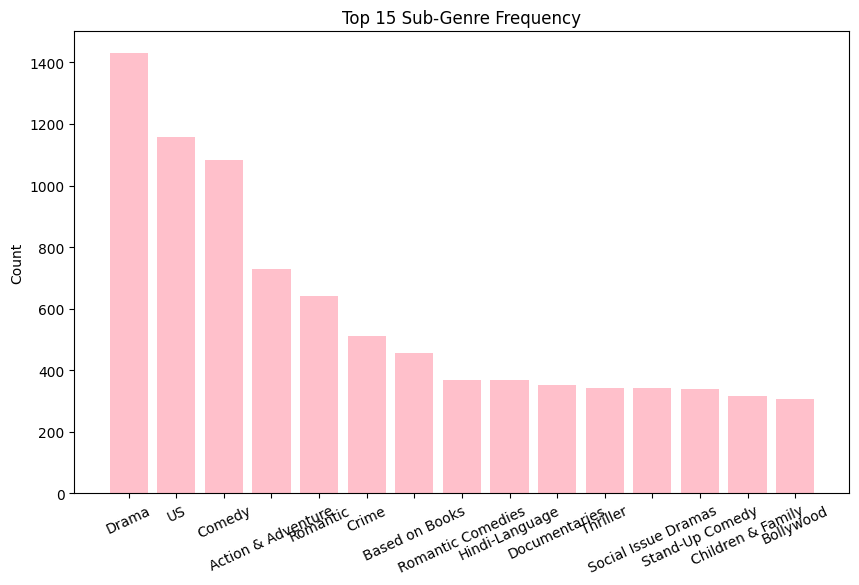

In [33]:

df['Main Genre'] = df['Main Genre'].astype(str).str.strip()

df['Sub Genres'] = df['Sub Genres'].fillna("").astype(str)
df_genre_expanded = df['Sub Genres'].str.split(',', expand=True)
sub_genres = df_genre_expanded.stack().str.strip()
sub_genres = sub_genres[sub_genres != ""]

# Count genre frequency
genre_counts = sub_genres.value_counts()

plt.figure(figsize=(10,6))
plt.bar(genre_counts.index[:15], genre_counts.values[:15], color='pink')
plt.xticks(rotation=25)
plt.title("Top 15 Sub-Genre Frequency")
plt.ylabel("Count")
plt.show()


COMMIT 4 -Release Year Trend + NumPy Diff + Line Chart


Yearly Change: [   0   -1    1   -1    0    0    0    1    0   -1    1    0   -1    1
    1   -2    3   -1    1   -1    0    3    1    1    2   -2   -1    1
    4   -4    2    5   -3    1    7    2    4   -6    5   -1    3    7
   -3   12   12   14   34   81   99   16   66   73  135  -15 -174 -376]


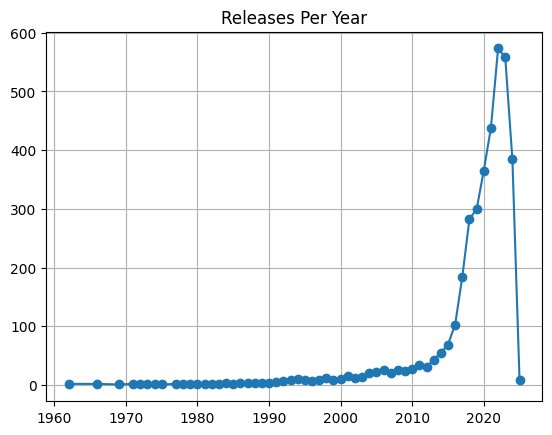

In [46]:
year_freq = df['Release Year'].value_counts().sort_index()

# NumPy trend (year-to-year difference)
diff = np.diff(year_freq.values)
print("Yearly Change:", diff)

plt.plot(year_freq.index, year_freq.values, marker='o')
plt.title("Releases Per Year")
plt.grid(True)
plt.show()




COMMIT 5 -Top 5 Movies (Based on Recommendation_Count)

Top 5 Counts: [12 12 12 12 12]


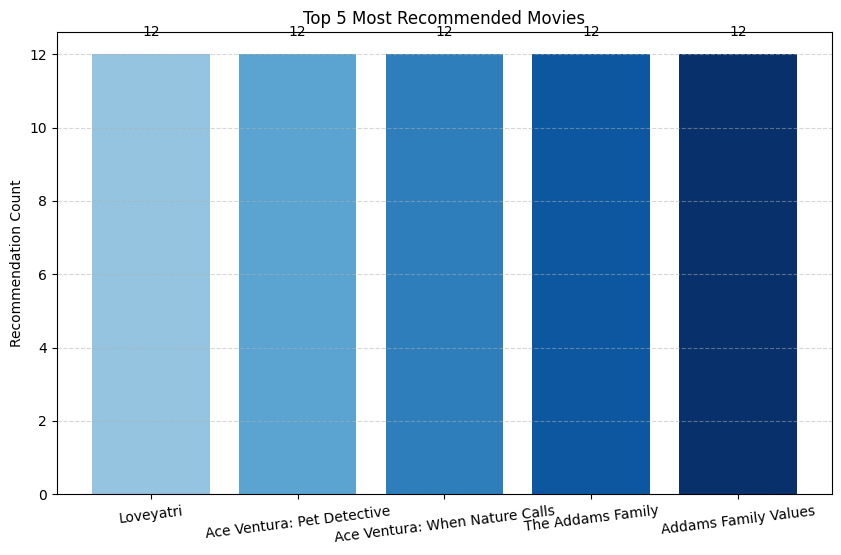

In [30]:
top5 = df.sort_values('Recommendation_Count', ascending=False).head(5)

# NumPy array of counts
top5_np = top5['Recommendation_Count'].to_numpy()
print("Top 5 Counts:", top5_np)

# Plot
plt.figure(figsize=(10, 6))

# Color gradient (Blues)
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top5)))

plt.bar(top5['Title'], top5['Recommendation_Count'], color=colors)

# Add value labels on bars
for i, v in enumerate(top5['Recommendation_Count']):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.xticks(rotation=7)
plt.title("Top 5 Most Recommended Movies")
plt.ylabel("Recommendation Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



COMMIT -6 Flop Movies (Least Recommended)

Lowest Counts: [1 3 3 3 3]
Minimum Count: 1


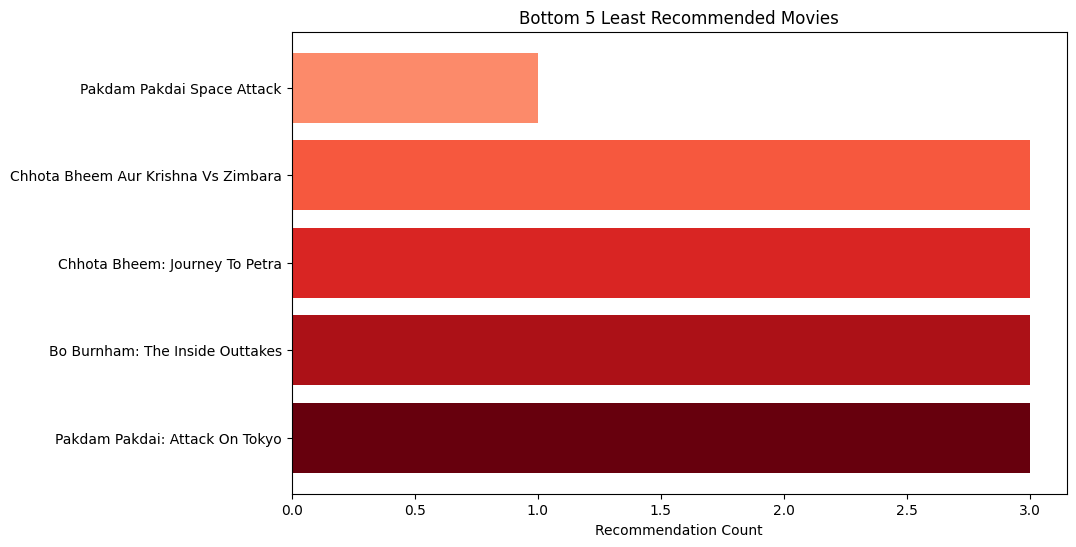

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\NETFLIX\\Netflix-Analysis\\SUBHAN_cleaned.csv")

# Bottom 5 (least recommended)
flop5 = df.sort_values('Recommendation_Count', ascending=True).head(5)

# NumPy stats
flop_np = flop5['Recommendation_Count'].to_numpy()
print("Lowest Counts:", flop_np)
print("Minimum Count:", np.min(flop_np))

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Reds(np.linspace(0.4, 1, 5))   # Gradient red color scheme

plt.barh(flop5['Title'], flop5['Recommendation_Count'], color=colors)
plt.xlabel("Recommendation Count")
plt.title("Bottom 5 Least Recommended Movies")

# Invert y-axis to show the smallest at the top
plt.gca().invert_yaxis()

plt.show()


check commit

In [9]:
print('hihi')

hihi


Sidra Commits

Commit 1— Content Aging Feature (How Old Each Movie/Show Is)

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("SUBHAN_cleaned.csv")

current_year = 2025

df['Content_Age'] = current_year - df['Release Year']

age_arr = df['Content_Age'].to_numpy()

print("Average Age:", np.mean(age_arr))
print("Newest:", np.min(age_arr))
print("Oldest:", np.max(age_arr))

Average Age: 6.360468209630221
Newest: 0
Oldest: 63


Commit 2 — NumPy-Based Maturity Rating Encoding

In [ ]:
df = pd.read_csv("SUBHAN_cleaned.csv")

mapping = {
    "U": 1,
    "U/A 7+": 2,
    "U/A 13+": 3,
    "U/A 16+": 4,
    "A": 5
}

df['Maturity_Code'] = df['Maturity Rating'].map(mapping)

code_arr = df['Maturity_Code'].to_numpy()

print("Unique Codes:", np.unique(code_arr))
print("Mean Code:", np.mean(code_arr))

Unique Codes: [1 2 3 4 5]
Mean Code: 3.7110933758978453


Commit 3-NumPy Filtering: Only Hindi or English Originals

In [54]:
df = pd.read_csv("SUBHAN_cleaned.csv")

# English filter
english_only = df[df['Original Audio'].astype(str).str.contains("English", na=False)]

# Hindi filter
hindi_only = df[df['Original Audio'].astype(str).str.contains("Hindi", na=False)]

print("English Count:", english_only.shape[0])
print("Hindi Count:", hindi_only.shape[0])


English Count: 2497
Hindi Count: 1393


Commit 4 — NumPy Title Length Feature Engineering

In [52]:
df = pd.read_csv("SUBHAN_cleaned.csv")

df['Title_Length'] = df['Title'].apply(lambda x: len(str(x)))

title_arr = df['Title_Length'].to_numpy()

print("Avg Length:", np.mean(title_arr))
print("Longest Title:", np.max(title_arr))
print("Shortest Title:", np.min(title_arr))


Avg Length: 18.670125033253523
Longest Title: 104
Shortest Title: 2


Commit 5-Top 10 Newest Titles Using NumPy Argsort

In [ ]:
df = pd.read_csv("SUBHAN_cleaned.csv")

years = df['Release Year'].to_numpy()
idx = np.argsort(years)[-10:]   # last 10 (newest)

print(df.iloc[idx][['Title', 'Release Year']])


                                             Title  Release Year
2793   Mononoke The Movie: The Phantom In The Rain          2024
2804             Untold: Hope Solo Vs. U.S. Soccer          2024
3730             Ari Shaffir: America’S Sweetheart          2025
3369            Gabriel Iglesias: Legend Of Fluffy          2025
2043                                Back In Action          2025
3601                                      Ad Vitam          2025
3702                 Umjolo: My Beginning, My End!          2025
3038                                 The Love Scam          2025
3630  Don'T Die: The Man Who Wants To Live Forever          2025
2210         Wallace & Gromit: Vengeance Most Fowl          2025


SUBHAN COMMITS:

Commit 1: Content Age-Rating Trend Over Years

Maturity Rating  A  U  U/A 13+  U/A 16+  U/A 7+
Release Year                                   
1962             0  0        2        0       0
1966             1  0        1        0       0
1969             0  0        1        0       0
1971             0  0        2        0       0
1972             1  0        0        0       0


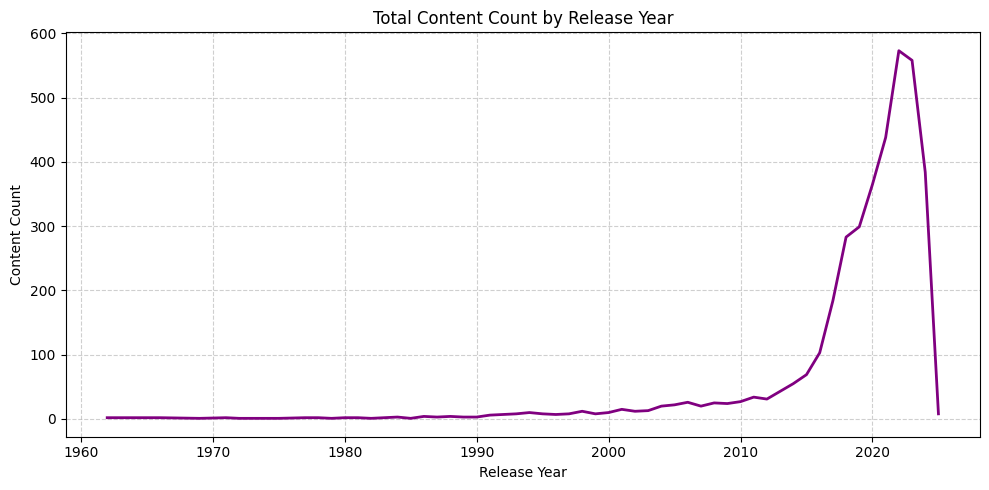

In [21]:
ct = pd.crosstab(df['Release Year'], df['Maturity Rating'])

print(ct.head())

plt.figure(figsize=(10,5))
plt.plot(ct.index, ct.sum(axis=1), linewidth=2, color='purple')
plt.title("Total Content Count by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Content Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Commit 2: Sub-Genre vs. Recommendation Score

Top Sub-Genres by Avg Recommendation Score:
 Sub Genres
based on a Play, Romantic Comedies, Comedy, Romantic, US                                                         12.0
Action & Adventure                                                                                               12.0
Action & Adventure, Chinese                                                                                      12.0
Action & Adventure, Spy, US                                                                                      12.0
Action & Adventure, Tamil-Language                                                                               12.0
Action & Adventure, Telugu-Language                                                                              12.0
Action & Adventure, US                                                                                           12.0
Action Anime, Japanese, Anime based on a Video Game, Horror, Horror Anime, Action & Adventure, Anime Features    12.0


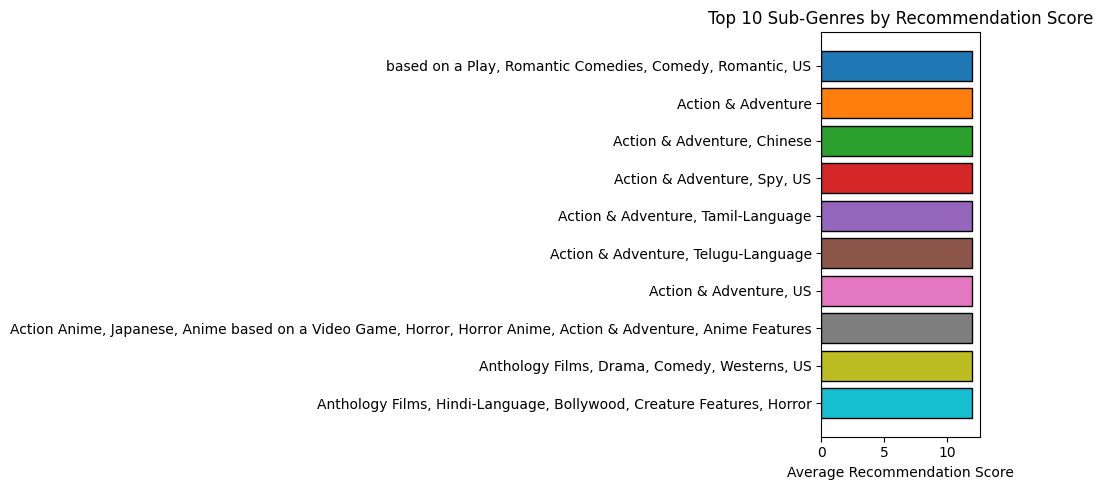

In [22]:
avg_rec_sub = (
    df.groupby('Sub Genres')['Recommendation_Count']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("Top Sub-Genres by Avg Recommendation Score:\n", avg_rec_sub)

colors = plt.cm.tab10(range(len(avg_rec_sub)))

plt.figure(figsize=(10,5))
plt.barh(avg_rec_sub.index, avg_rec_sub.values, color=colors, edgecolor='black')
plt.xlabel("Average Recommendation Score")
plt.title("Top 10 Sub-Genres by Recommendation Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Commit 3: Most Recommended Titles (Top 10)

                            Title  Recommendation_Count
0      Ace Ventura: Pet Detective                    12
1  Ace Ventura: When Nature Calls                    12
2               The Addams Family                    12
3            Addams Family Values                    12
4                       Agneepath                    12
5                       Assassins                    12
6                      Awakenings                    12
7                    Blue Thunder                    12
8      A Chinese Odyssey (Part I)                    12
9    Geronimo: An American Legend                    12


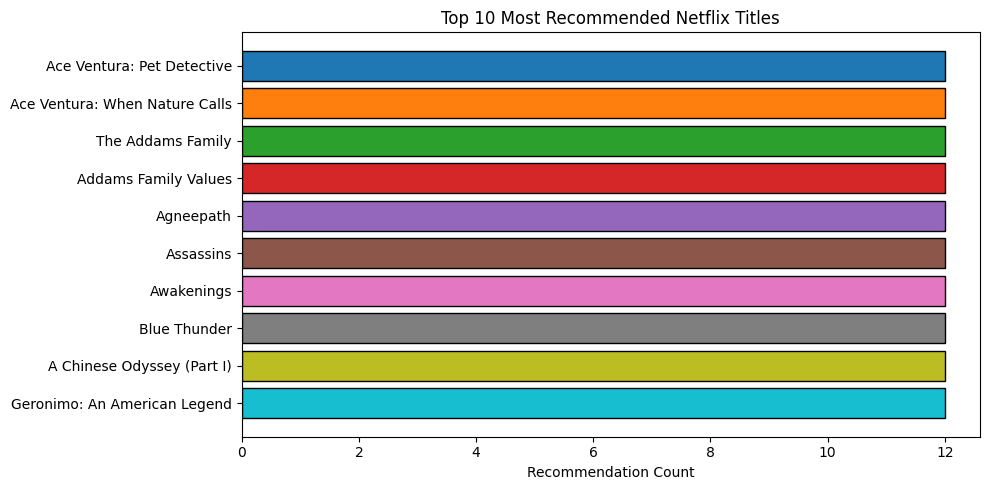

In [23]:
top10 = df.nlargest(10, 'Recommendation_Count')[['Title', 'Recommendation_Count']]

print(top10)

colors = plt.cm.tab10(range(len(top10)))

plt.figure(figsize=(10,5))
plt.barh(top10['Title'], top10['Recommendation_Count'], color=colors, edgecolor='black')
plt.xlabel("Recommendation Count")
plt.title("Top 10 Most Recommended Netflix Titles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Commit 4:Most Popular Audio Languages


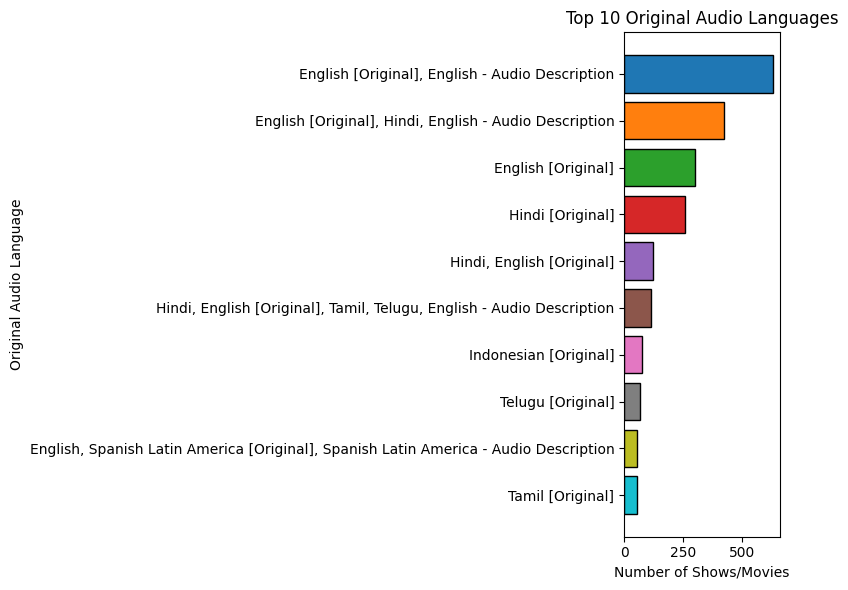

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 original audio languages
audio_counts = df['Original Audio'].value_counts().head(10)

# Generate a color map
colors = plt.cm.tab10(np.arange(len(audio_counts)))

plt.figure(figsize=(8,6))
plt.barh(audio_counts.index, audio_counts.values, color=colors, edgecolor='black')
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Original Audio Language")
plt.title("Top 10 Original Audio Languages")
plt.gca().invert_yaxis()  # Highest value on top
plt.tight_layout()
plt.show()


Commit 5:Sub-Genre Frequency Analysis

Top Sub-Genres:
 Drama                 1429
US                    1157
Comedy                1084
Action & Adventure     729
Romantic               641
Crime                  512
Based on Books         456
Romantic Comedies      370
Hindi-Language         367
Documentaries          352
Name: count, dtype: int64


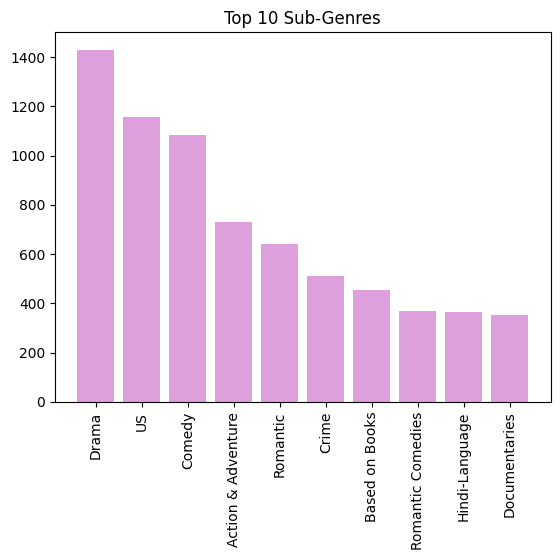

In [35]:
sub_genres_expanded = df['Sub Genres'].str.split(', ', expand=True).stack()

counts = sub_genres_expanded.value_counts().head(10)

print("Top Sub-Genres:\n", counts)

plt.bar(counts.index, counts.values, color="plum")
plt.xticks(rotation=90)
plt.title("Top 10 Sub-Genres")
plt.show()